In [6]:
from datasets import load_dataset
from PIL import Image, ImageFilter, ImageEnhance, ImageOps
import numpy as np
import matplotlib.pyplot as plt

### Food101에서 train split 한 장만 로드

Original size: (384, 512) | mode: RGB


(np.float64(-0.5), np.float64(383.5), np.float64(511.5), np.float64(-0.5))

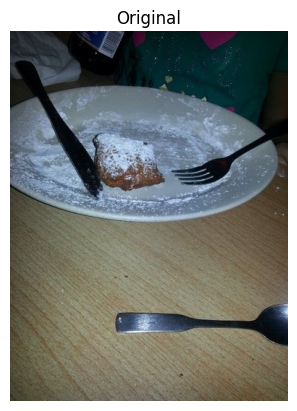

In [7]:
ds = load_dataset("ethz/food101", split="train[:1]")
sample = ds[0]
orig_img: Image.Image = sample["image"]  # PIL.Image

print("Original size:", orig_img.size, "| mode:", orig_img.mode)
plt.imshow(orig_img)
plt.title("Original")
plt.axis("off")


### 224*224 resizing (중앙 기준 크롭)

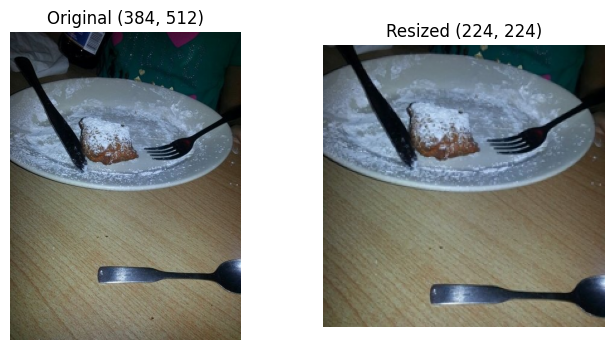

In [8]:
resized = ImageOps.fit(orig_img.convert("RGB"), (224, 224), method=Image.BICUBIC)

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(orig_img)
axs[0].set_title(f"Original {orig_img.size}")
axs[0].axis("off")

axs[1].imshow(resized)
axs[1].set_title(f"Resized {resized.size}")
axs[1].axis("off")

plt.show()


### Grayscale & Normalize

Gray shape: (224, 224) | min/max: 0.0 0.9490196


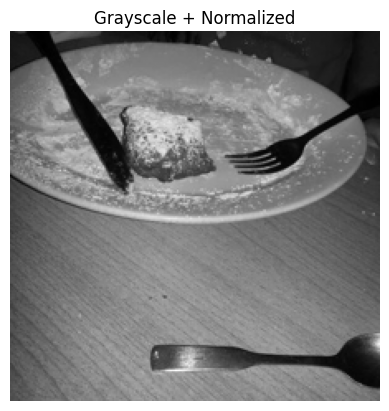

In [9]:
# Grayscale
gray = ImageOps.grayscale(resized)
# Normalize to [0,1] (학습용)
gray_norm = np.asarray(gray, dtype=np.float32) / 255.0

print("Gray shape:", gray.size, "| min/max:", gray_norm.min(), gray_norm.max())

# 시각화(정규화값을 다시 0~255로 되돌려 표시)
plt.imshow((gray_norm * 255).astype(np.uint8), cmap="gray")
plt.title("Grayscale + Normalized")
plt.axis("off")
plt.show()


### Denoise

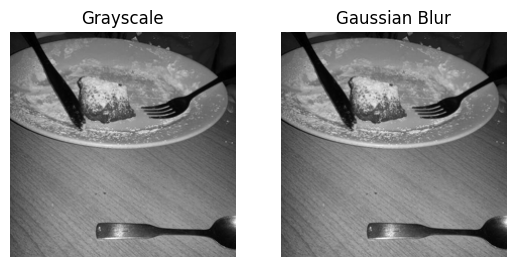

In [16]:
# 가우시안 블러(살짝)
denoised = gray.filter(ImageFilter.GaussianBlur(radius=0.2))

fig, axs = plt.subplots(1, 2)
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Grayscale")
axs[0].axis("off")

axs[1].imshow(denoised, cmap="gray")
axs[1].set_title("Gaussian Blur")
axs[1].axis("off")
plt.show()

### 데이터 증강(좌우 반전)

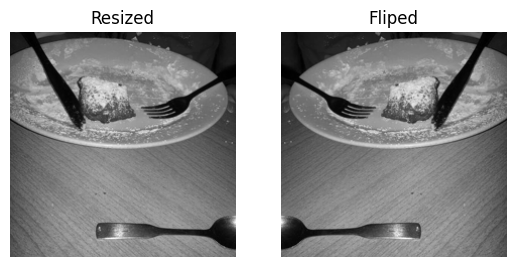

In [11]:
# 좌우 반전은 일반적으로 컬러 기준으로 많이 쓰므로 resized(RGB)에 적용
flipped = ImageOps.mirror(denoised)

fig, axs = plt.subplots(1, 2)
axs[0].imshow(denoised, cmap="gray")
axs[0].set_title("Resized")
axs[0].axis("off")

axs[1].imshow(flipped, cmap="gray")
axs[1].set_title("Fliped")
axs[1].axis("off")
plt.show()


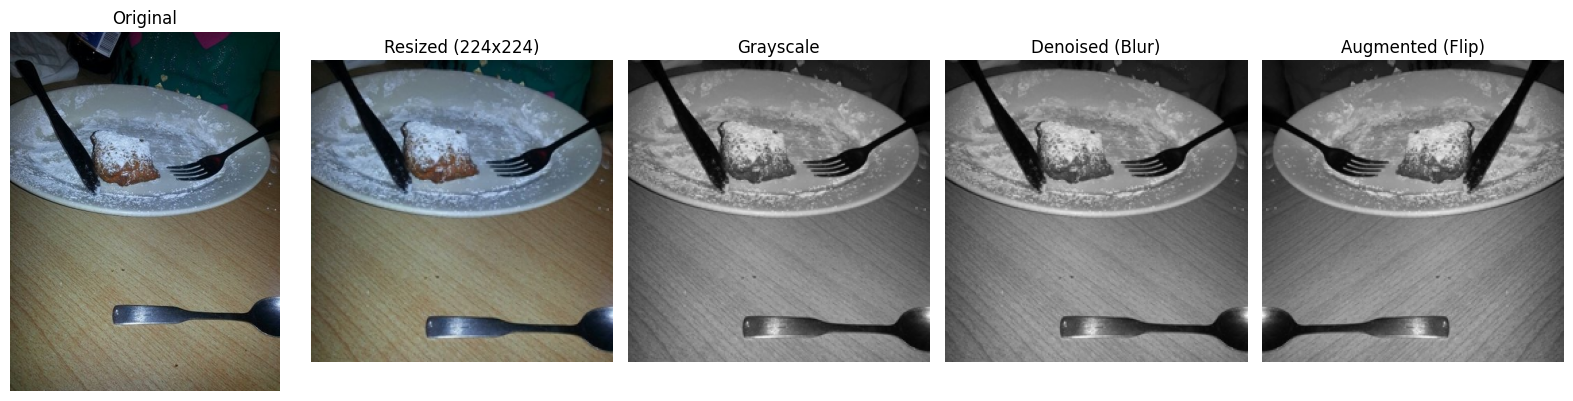

In [17]:
# 원본, 크기조정, 색상변환(회색), 노이즈제거, 좌우반전 — 5개 한 번에
fig, axs = plt.subplots(1, 5, figsize=(16, 4))

axs[0].imshow(orig_img)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(resized)
axs[1].set_title("Resized (224x224)")
axs[1].axis("off")

axs[2].imshow(gray, cmap="gray")
axs[2].set_title("Grayscale")
axs[2].axis("off")

axs[3].imshow(denoised, cmap="gray")
axs[3].set_title("Denoised (Blur)")
axs[3].axis("off")

axs[4].imshow(flipped, cmap="gray")
axs[4].set_title("Augmented (Flip)")
axs[4].axis("off")

plt.tight_layout()
plt.show()
